In [1]:
import torch
import pytorch_mask_rcnn as pmr


use_cuda = True
dataset = "coco"
ckpt_path = "maskrcnn_coco-100.pth"
data_dir = "../Vegas_coco_random_splits/"

device = torch.device("cuda" if torch.cuda.is_available() and use_cuda else "cpu")
if device.type == "cuda":
    pmr.get_gpu_prop(show=True)
print("\ndevice: {}".format(device))

ds = pmr.datasets(dataset, data_dir, "test", train=True)
#indices = torch.randperm(len(ds)).tolist()
#d = torch.utils.data.Subset(ds, indices)
d = torch.utils.data.DataLoader(ds, shuffle=False)

model = pmr.maskrcnn_resnet50(False, max(ds.classes) + 1).to(device)
model.eval()
model.head.score_thresh = 0.3

if ckpt_path:
    checkpoint = torch.load(ckpt_path, map_location=device)
    model.load_state_dict(checkpoint["model"])
    print(checkpoint["eval_info"])
    del checkpoint
    
for p in model.parameters():
    p.requires_grad_(False)

cuda: True
available GPU(s): 1
0: {'name': 'Quadro RTX 6000', 'capability': [7, 5], 'total_momory': 23.65, 'sm_count': 72}

device: cuda
loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.519
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.757
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.614
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.067
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.685
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.582
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.027
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.218
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.563
 Average Recall     (AR) @[ IoU=0.50:0.95 |

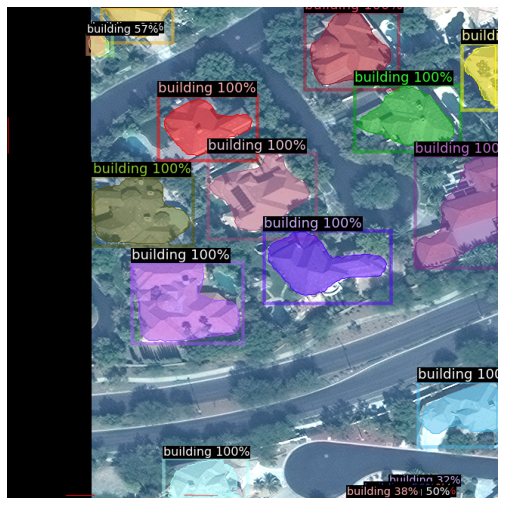

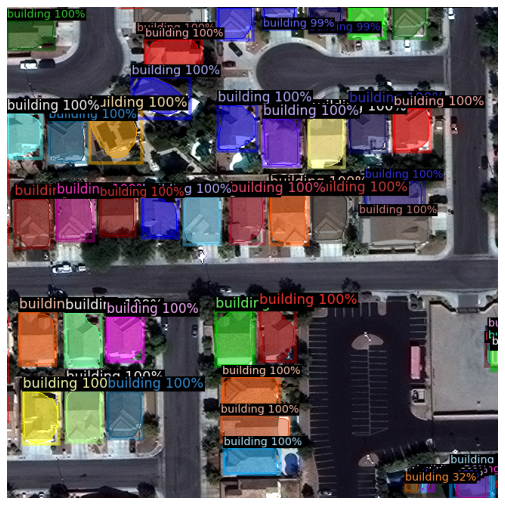

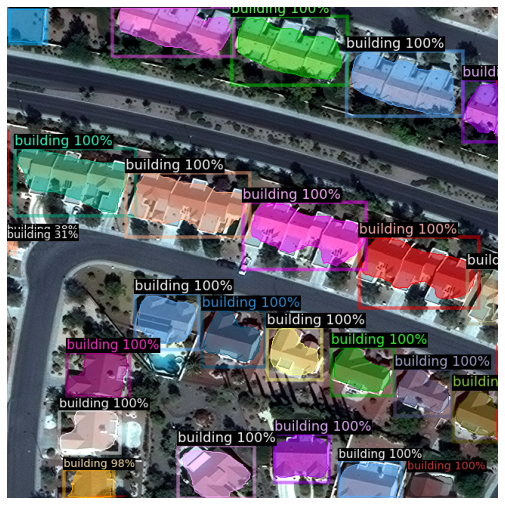

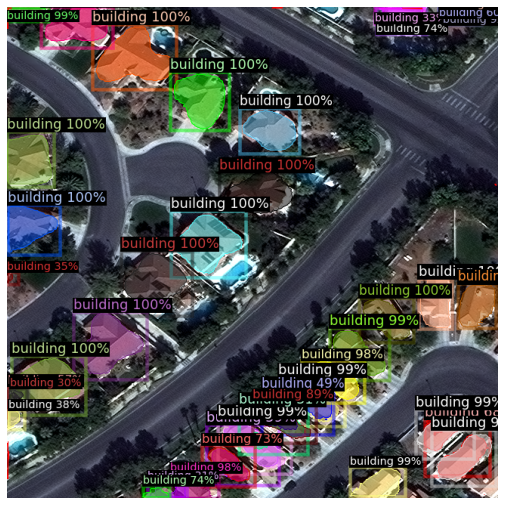

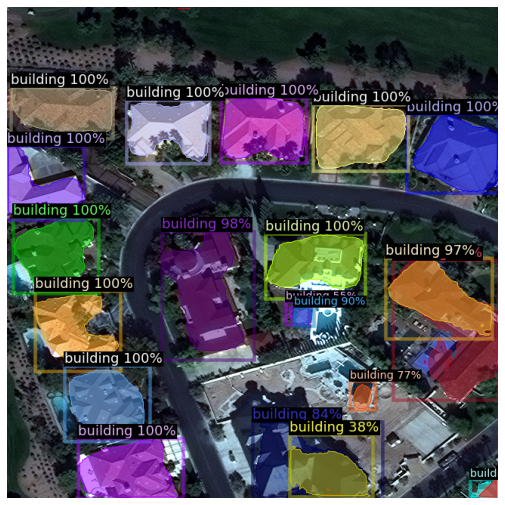

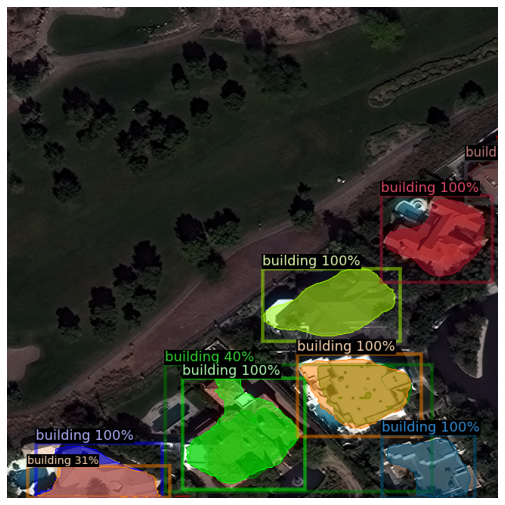

In [3]:
iters = 6

for i, (image, target) in enumerate(d):
    image = image.to(device)[0]
    #target = {k: v.to(device) for k, v in target.items()}
    
    with torch.no_grad():
        result = model(image)
    # print(result)
    pmr.show(image, result, ds.classes, "./images/output{}.jpg".format(i))

    if i >= iters - 1:
        break